# Data Visualization 

## Objectives

- **Answer Business Requirement 1:**
    - The client is interested in conducting a study to visually differentiate a healthy cherry leaf from one with powdery mildew.

## Inputs

- inputs/cherry_leaves/cherry-leaves/train
- inputs/cherry_leaves/cherry-leaves/test
- inputs/cherry_leaves/cherry-leaves/validation

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* CI Walkthrough Project 01  Malaria Detector was used as study and reference material.

---

# Change working directory

Change the working directory from its current folder to its parent folder
* Access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/mildew-detection/jupyter_notebooks'

Make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/mildew-detection'

# Import libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("dark")
from matplotlib.image import imread

## Set input directories

Set train, validation and test paths.

In [5]:
my_data_dir = 'inputs/cherry_leaves/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Set output directory

Create folders to store results

In [6]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


## Set labels

In [7]:
# Set the label names
labels = os.listdir(train_path)
print('Label for images are', labels)

Label for images are ['healthy', 'powdery_mildew']


---

# Data visualisation of image data

---

## Image shape 

Compute average images size on train set.

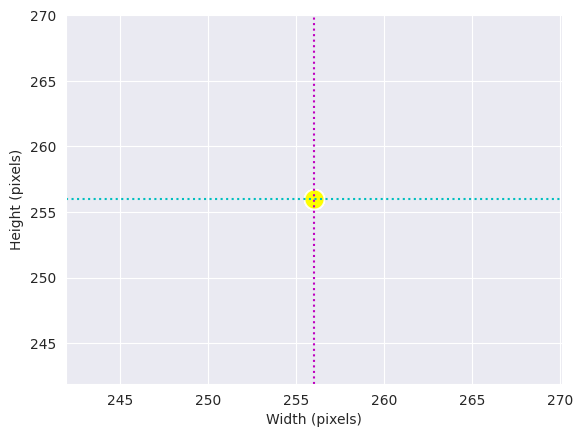

Width average: 256 
Height average: 256


In [28]:
dim1, dim2 = [], []
for label in labels:
    for image_filename in os.listdir(train_path + '/' + label):
        img = imread(train_path + '/' + label + '/' + image_filename)
        d1, d2, colors = img.shape
        dim1.append(d1)  # image height
        dim2.append(d2)  # image width

sns.set_style("darkgrid")
fig, axes = plt.subplots()
sns.scatterplot(x=dim2, y=dim1, alpha=0.8, s=200, color='yellow')
axes.set_xlabel("Width (pixels)")
axes.set_ylabel("Height (pixels)")
dim1_mean = int(np.array(dim1).mean())
dim2_mean = int(np.array(dim2).mean())
axes.axvline(x=dim1_mean, color='m', linestyle=':')
axes.axhline(y=dim2_mean, color='c', linestyle=':')
plt.savefig(f'{file_path}/avg_img_size.png',
            bbox_inches='tight', dpi=150)
plt.show()
print(f"Width average: {dim2_mean} \nHeight average: {dim1_mean}")

- Images size for training the model is the average from all images in the train set.

In [29]:
image_shape = (dim1_mean, dim2_mean, 3)
image_shape

(256, 256, 3)

- Save the image shape embeddings as pkl file in outputs folder

In [30]:
joblib.dump(value=image_shape ,
            filename=f"{file_path}/image_shape.pkl")

['outputs/v1/image_shape.pkl']

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* If you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
    # create here your folder
    # os.makedirs(name='')
except Exception as e:
    print(e)
